#### Technical setup
> Skip this section

In [168]:
# @formatter:off

In [169]:
%reload_ext autoreload
%autoreload 2
# @formatter:on

# Setup

In [170]:
symbol = 'ETHUSDT'
symbol_k_lines_interval = '1s'
symbol_ask_bid_price_difference = 0.01
price_step_ratio = 0.001

# Ticks

/Users/nikita/Documents/projects/things-team/to-the-moon/ttm-analytics/src/chart/ttm_chart.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


,timestamp,bid_price,ask_price
0,1677628800000,1605.24,1605.25
1,1677628801000,1605.46,1605.47
2,1677628802000,1605.46,1605.47
3,1677628803000,1605.46,1605.47
4,1677628804000,1605.47,1605.48
...,...,...,...
86395,1677715195000,1665.22,1665.23
86396,1677715196000,1665.23,1665.24
86397,1677715197000,1665.23,1665.24
86398,1677715198000,1665.22,1665.23


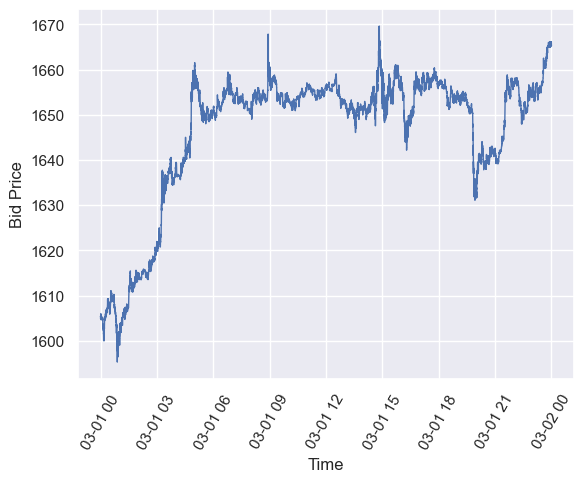

In [171]:
from binance.binance_k_line_loader import load_binance_k_lines
from binance.binance_tick_loader import load_binance_ticks
from chart.ttm_chart import draw_line_chart

k_lines = load_binance_k_lines(f"../../../ttm-data/{symbol}-{symbol_k_lines_interval}-2023-03-01.csv")

ticks = load_binance_ticks(k_lines, symbol_ask_bid_price_difference)

draw_line_chart(ticks.timestamp, ticks.bid_price, name='Bid Price')
ticks

# Simulation

In [172]:
from trade.trade_simulator import TradeSimulator

trade_simulator: TradeSimulator = TradeSimulator()
trade_simulator.process_ticks(ticks, price_step_ratio)

# Results


Closed orders count: 430
Cumulative profit: -17.429999999993697


/Users/nikita/Documents/projects/things-team/to-the-moon/ttm-analytics/src/chart/ttm_chart.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


,open_timestamp,type,open_price,close_price,close_timestamp,profit,cumulative_profit
0,1677629231000,BUY,1603.36,1601.48,1677629370000,-1.88,-1.88
1,1677629370000,BUY,1601.49,1603.28,1677629547000,1.79,-0.09
2,1677629547000,SELL,1603.28,1605.15,1677629568000,-1.87,-1.96
3,1677629568000,SELL,1605.14,1606.81,1677629857000,-1.67,-3.63
4,1677629857000,SELL,1606.80,1608.50,1677630140000,-1.70,-5.33
...,...,...,...,...,...,...,...
425,1677713655000,SELL,1660.83,1662.53,1677713676000,-1.70,-17.13
426,1677713676000,SELL,1662.52,1660.80,1677713708000,1.72,-15.41
427,1677713708000,BUY,1660.80,1662.49,1677714199000,1.69,-13.72
428,1677714199000,SELL,1662.49,1664.44,1677714367000,-1.95,-15.67


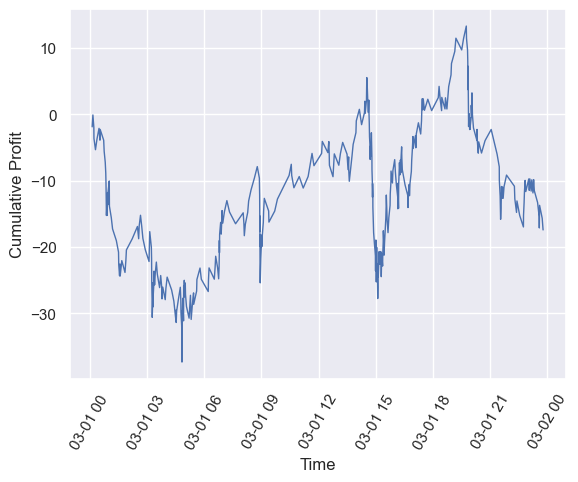

In [173]:
from trade.trade_simulator_order import TradeSimulatorOrder

closed_orders: [TradeSimulatorOrder] = trade_simulator.get_closed_orders()
cumulative_profit: float = trade_simulator.get_cumulative_profit()

profits = trade_simulator.get_profits()

print(f"=========")
print(f"Closed orders count: {len(closed_orders)}")
print(f"Cumulative profit: {cumulative_profit}")
print(f"=========")
draw_line_chart(profits.open_timestamp, profits.cumulative_profit, name='Cumulative Profit')

profits